# Red Wine Quality

Problem Statement: The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model.

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
WineDF = pd.read_csv('winequality-red.csv')

In [3]:
WineDF.shape

(1599, 12)

In [4]:
WineDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Feature column data type indicates that feature data are continuous in nature while target / label data type indicates that dependent variable data is categorical in nature.

# Checking for null / values missing

In [5]:
WineDF.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no values missing from dataset

# Getting the basic summary and statistical information of the data.

In [6]:
WineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
WineDF.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
WineDF.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

This is a Classification Problem since the Target variable / Label column (quality) has Catergorical type of Data.¶

Checking for '0' values in dataset

In [9]:
(WineDF==0).sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

'citric acid' has 132 values as 0 which accounts for 8.2 % of total 'citric acid' data. An explaination for this is that usually most of citric acid is used up during the process of fermentation. It is also added separately to improve the wine's freshness.

# Interpreting Relationship between Dependent and Independent Variables

In [10]:
X = WineDF.drop(columns = ['quality'])
y = WineDF['quality']

# Analyzing the Target Class

In [11]:
WineDF['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# There are 6 unique catergorical values in the Label column / target variable.

In [12]:
WineDF['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Class

'3' : Has 10 values

'4' : Has 53 values

'5' : Has 681 values

'6' : Has 638 values

'7' : Has 199 values

'8' : Has 18 values

# Checking for Class Imbalance

<AxesSubplot:xlabel='quality', ylabel='count'>

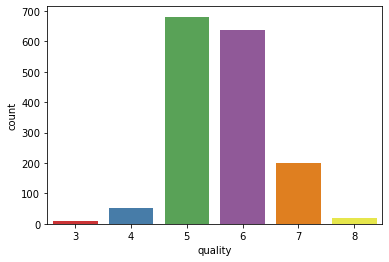

In [13]:
sns.countplot(WineDF['quality'], palette="Set1")


There is a substantial imbalance in classes. Classes '5' and '6' carry the most values while '3','4','7','8' carry minimal values.

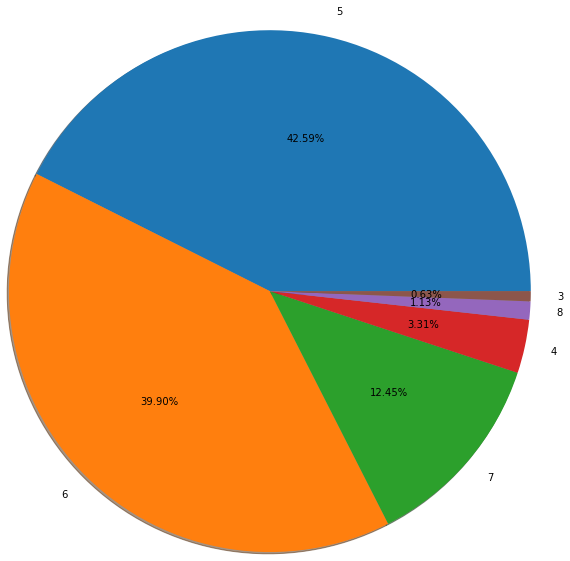

In [14]:
labels = '5','6','7','4','8','3'
fig, ax = plt.subplots()
ax.pie(WineDF['quality'].value_counts(),labels = labels,radius =3,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class '3' : Has 0.63% of total values

'4' : Has 3.31% of total values

'5' : Has 42.59% of total values

'6' : Has 39.90% of total values

'7' : Has 12.45% of total values

'8' : Has 1.13% of total values

We can mitigate the class imbalance issue by classifying all the above values into 'Good' and 'Not Good' depending on the criterion that all the values that fall in classes 5 and below 5 belong to 'Not Good' Category, while those that fall in classess greater than '5' belong to 'Good' Category.

'Good' is encoded as '1' and 'Not Good' is encoded as 0

In [15]:
WineDF['quality'] = np.where((WineDF['quality'] <= 5), 0,1)


In [16]:
WineDF['quality'].unique()

array([0, 1])

<AxesSubplot:xlabel='quality', ylabel='count'>

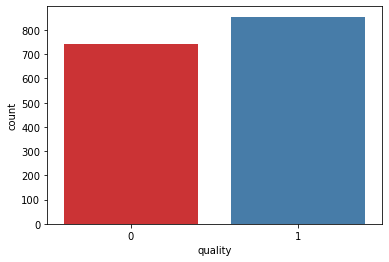

In [17]:
sns.countplot(WineDF['quality'], palette="Set1")

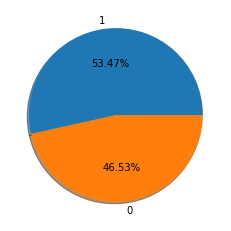

In [18]:
labels = '1','0',
fig, ax = plt.subplots()
ax.pie(WineDF['quality'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class '1' has 6.94% more values than Class '0'.Therefore, now there isn't a substantial imbalance in data distribution between the 2 classes.

In [19]:
WineDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Finding Correlation

In [20]:
w_corr = WineDF.corr()

In [21]:
w_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


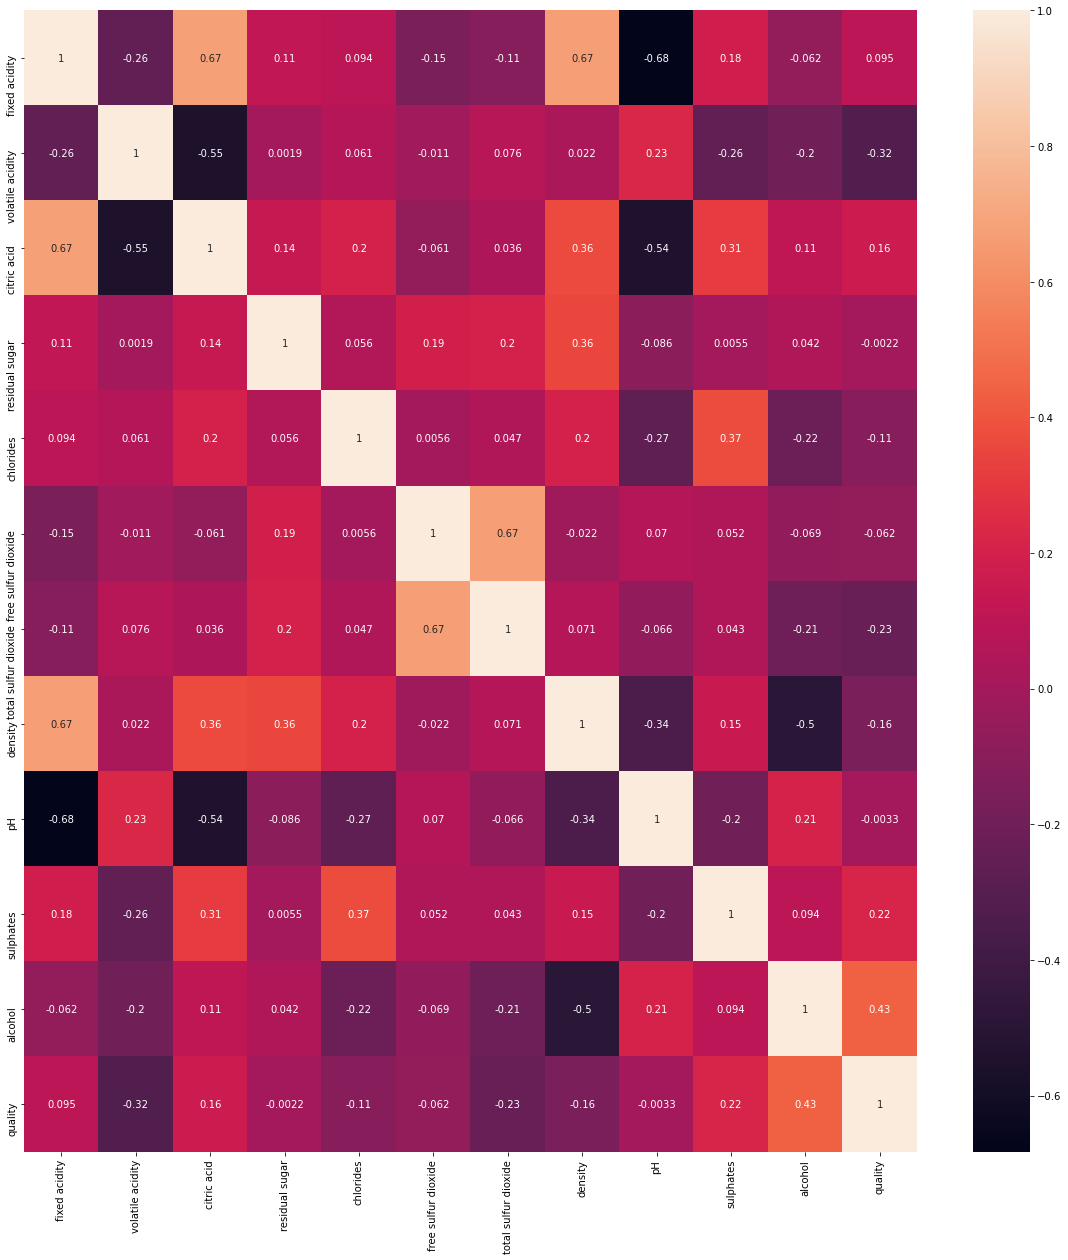

In [22]:
plt.figure(figsize=(20,21))
sns.heatmap(w_corr,annot=True)
plt.show()

Features like 'alcohol', 'sulphates' have a good positive correlation with 'quality' while 'volatile acidity', 'total sulfur dioxide' have a significant negative correlation with 'quality'. 'pH' has a negative correlation of -0.0033 which is of least significance and 'residual sugar' has has a negative correlation of -0.0022 which is insignificant.

# Visualizing correlation of feature columns with label column.¶

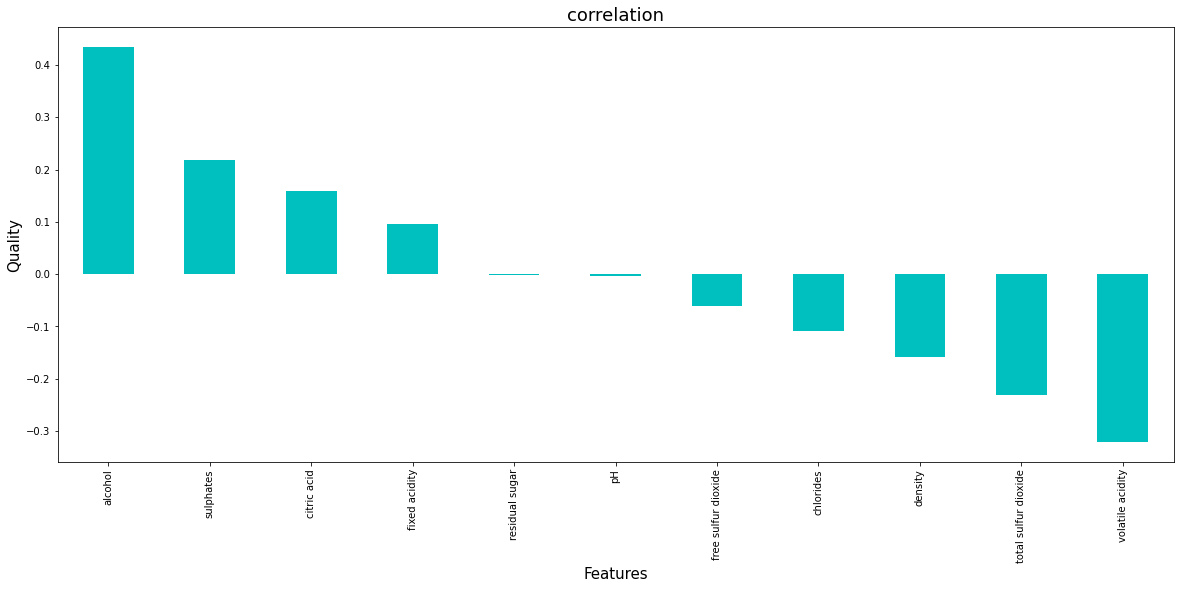

In [23]:
plt.figure(figsize = (20,8))
WineDF.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Quality',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

'alchol' and 'volatile acidity have the strongest positive and negative correlations with 'quality' respectively. 'sulphates' and 'total sulfur dioxide'(higher the total sulfur dioxide, lower is the quality) are next in terms of correlation.'Citric acid','density', 'fixed acidity','chlorides','free sulfur dioxide' have weaker correlation while 'residual sugar' and 'pH' have insignificant correlations.

# Interpreting Relationship between Dependent Class and Independent Variables

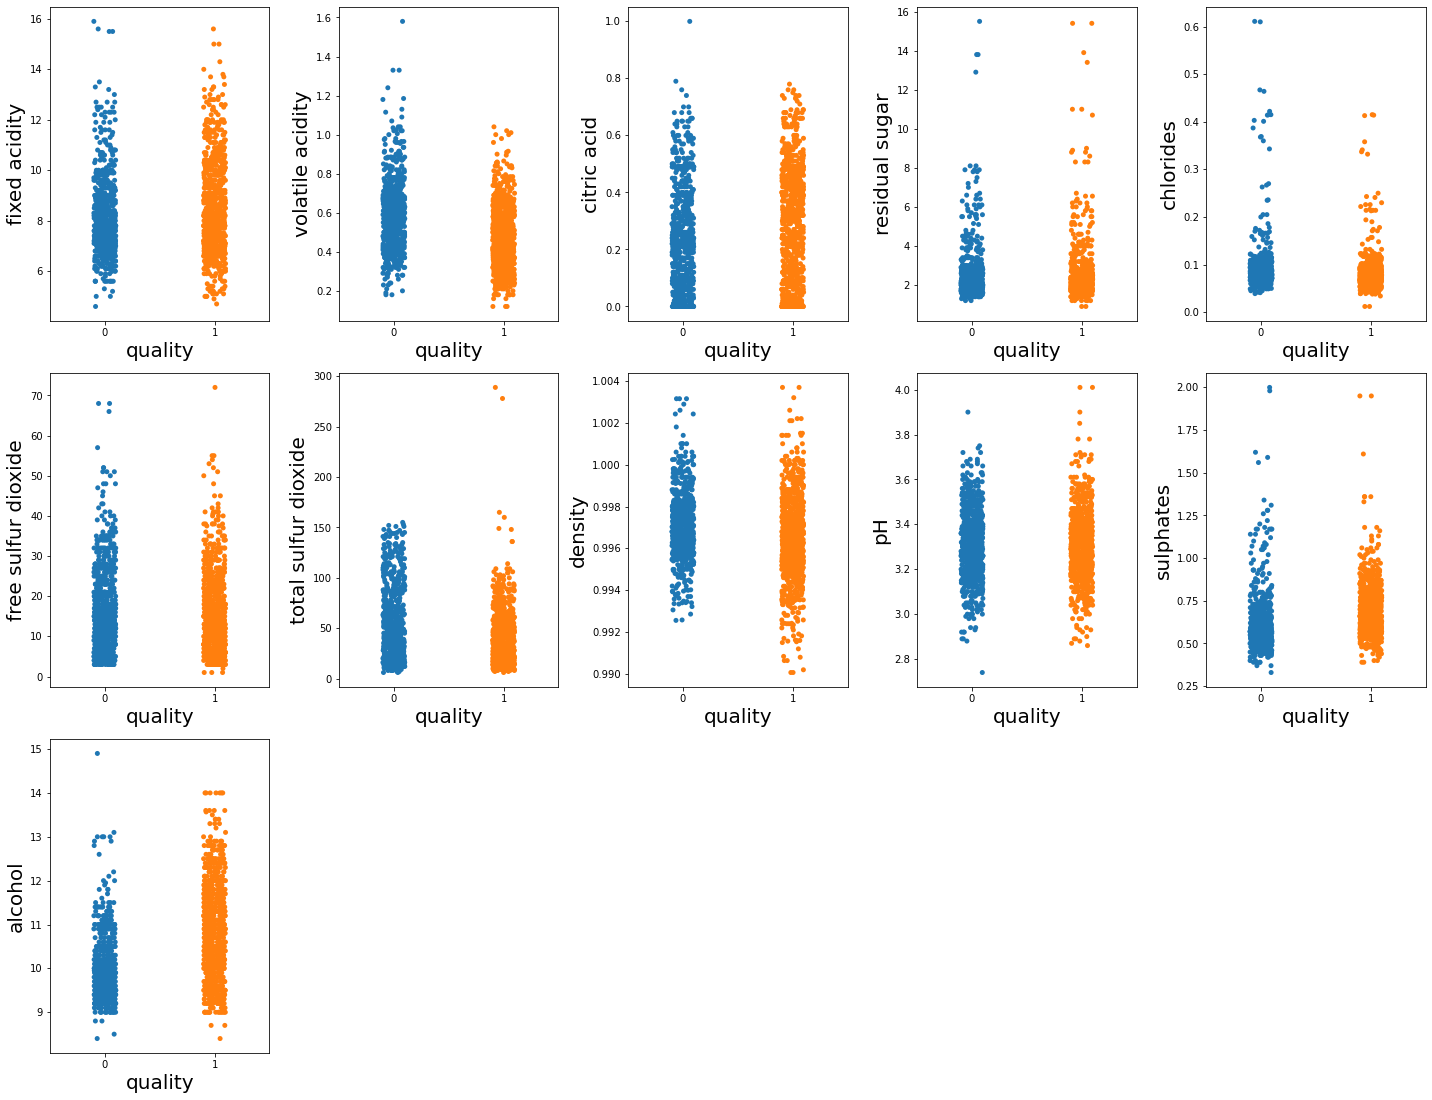

In [24]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = WineDF['quality']
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.stripplot(y,X[col])
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

From the graphs, it can be observed that 'alchol' and 'volatile acidity' are good indicators of wine quality. While 'pH' and 'residual sugar' do not help in clearly distinguishing good quality wine from subpar wine.

# Checking for Skewness and presence of Outliers in Feature Data

In [25]:
X = WineDF.drop(columns = ['quality'])
y = WineDF['quality']

In [27]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [28]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

In [29]:
X.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

# Visualising Data Distribution for every column

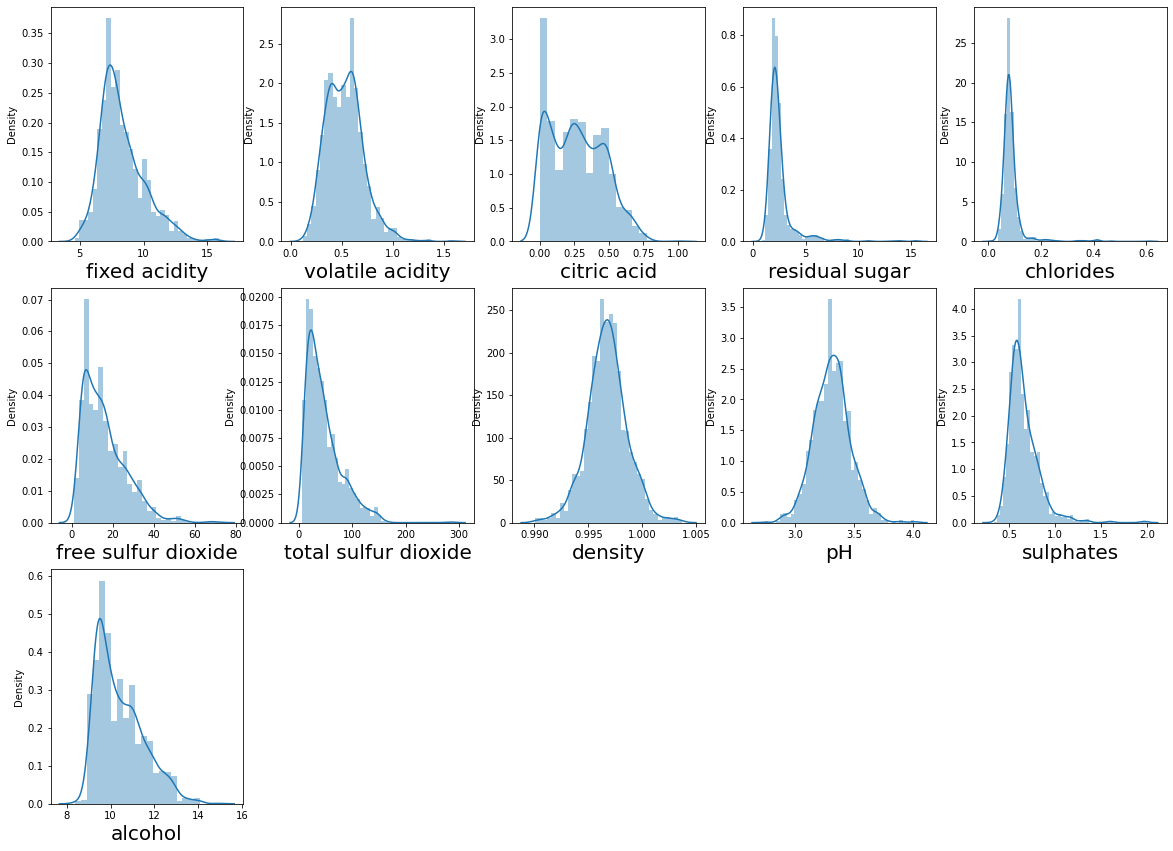

In [30]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

'sulphates', 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide' ,'sulphates', 'alcohol' are all right skewed distributions.

# Checking for Outliers

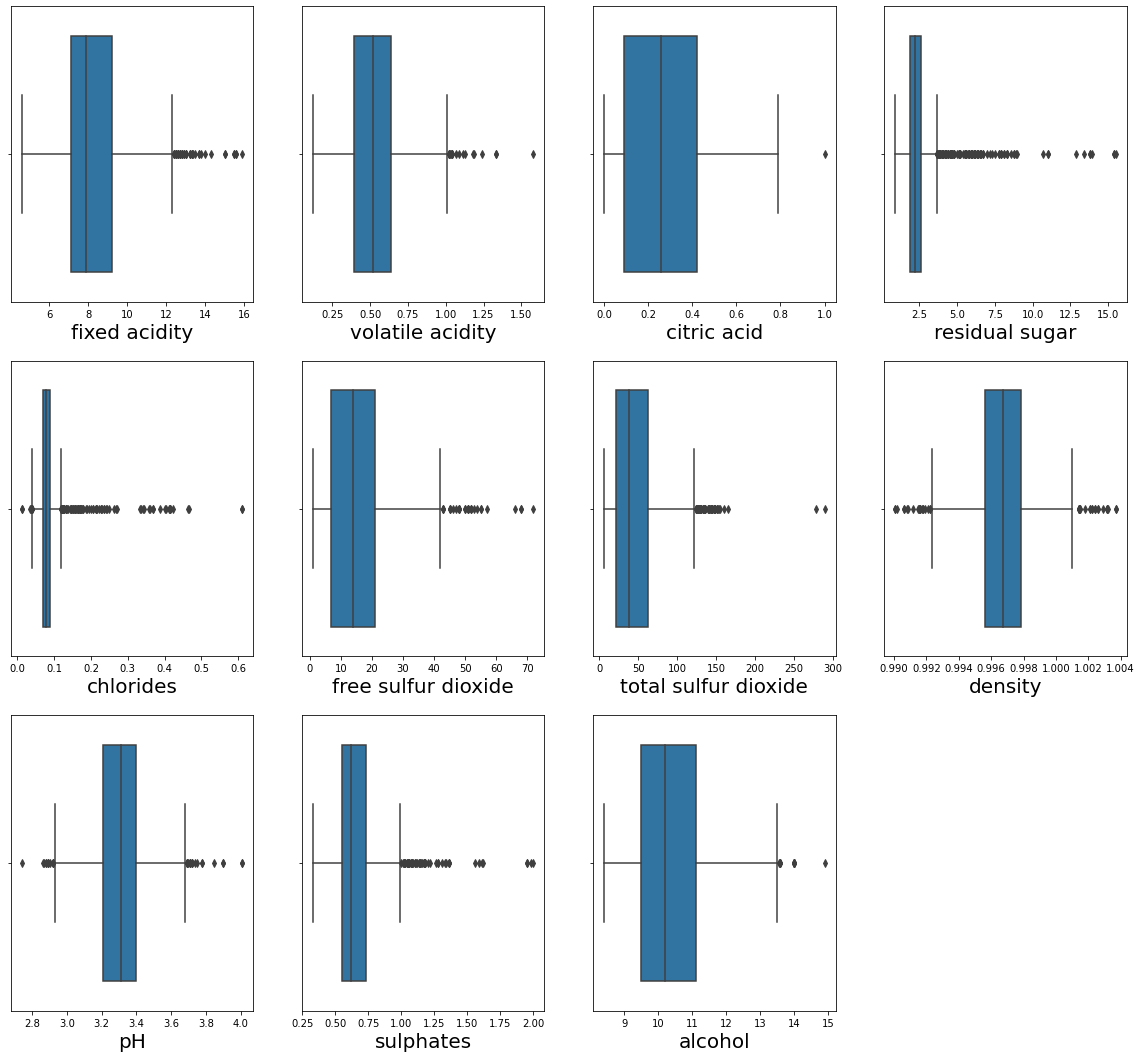

In [31]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

From the Boxplots it is evident that 'pH', 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide' ,'sulphates', 'alcohol','citric acid' have outliers present.

# Removing Outliers using Z score Method

In [32]:
df2 = WineDF.copy()

In [33]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)]

In [34]:
df3.shape

(1458, 12)

In [35]:
df2.shape

(1599, 12)

PERCENTAGE DATA LOSS:

In [36]:
loss=(1599-1458)/1599 * 100
loss

8.818011257035648

8.8% Data loss is within acceptable range

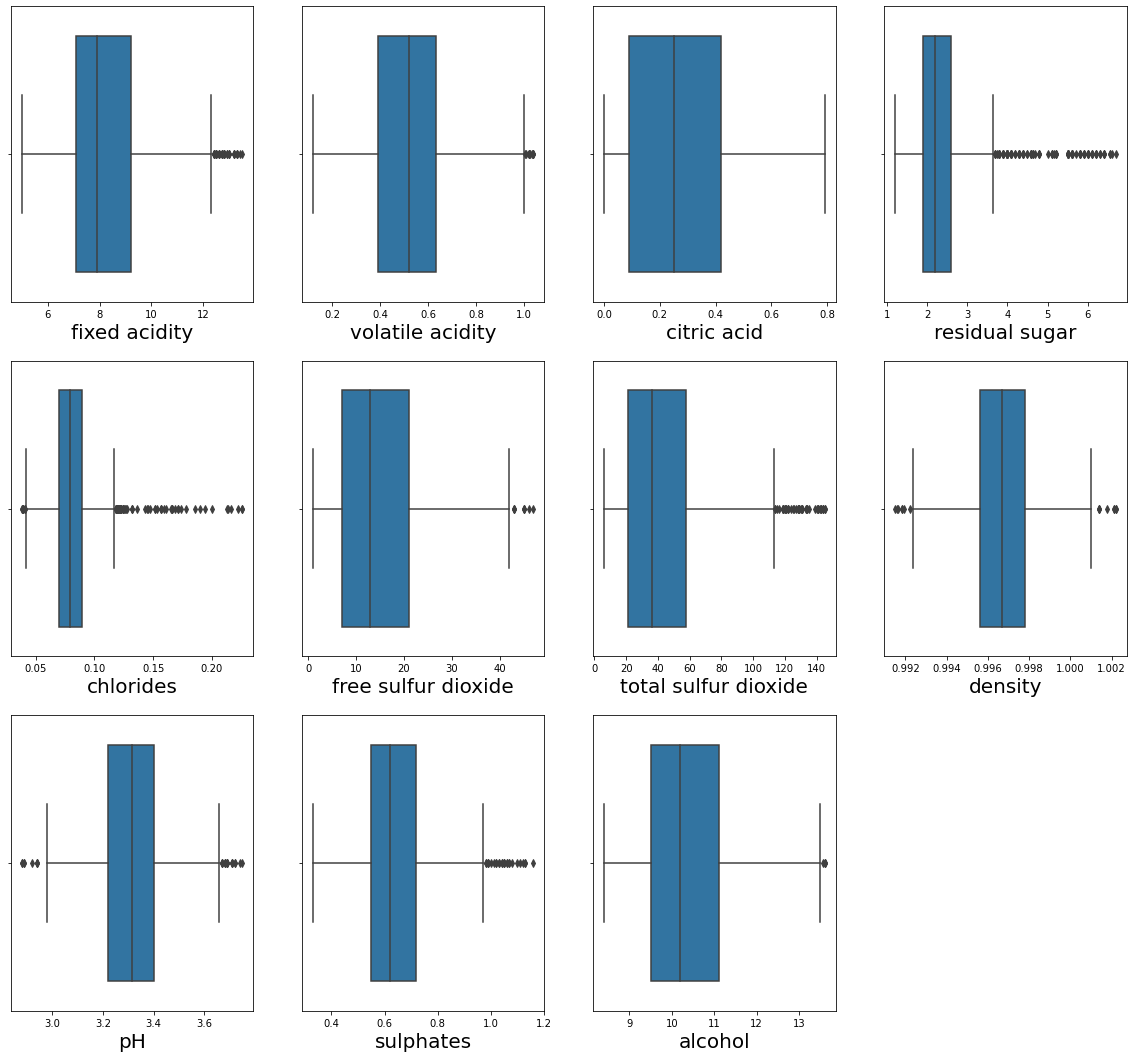

In [37]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df3:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(df3[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some amount of outliers has been removed.

In [38]:
X.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [39]:
df3.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                -0.159793
dtype: float64

Skewness has been reduced a little due to outlier removal.

# Reducing the skewness further

In [40]:
WineDF = df3.copy()

In [41]:
feat = ['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']

In [42]:
SkewedDF = WineDF[feat].copy()

# Trying Log Transformer Method

In [43]:
for col in SkewedDF:
    SkewedDF[col] = np.log(SkewedDF[col])

In [44]:
SkewedDF.skew()

fixed acidity           0.377100
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
sulphates               0.345344
alcohol                 0.588835
dtype: float64

# Trying PowerTransformer method

In [45]:
from sklearn.preprocessing import PowerTransformer

In [46]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [47]:
df4 = WineDF[feat].copy()

In [48]:
df4.skew()

fixed acidity           0.820879
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
sulphates               0.893297
alcohol                 0.757396
dtype: float64

In [49]:
transformed= powtrans.fit_transform(df4)

In [50]:
type(transformed)

numpy.ndarray

In [51]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [52]:
transformed.skew()

fixed acidity           0.019079
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
sulphates               0.021132
alcohol                 0.108436
dtype: float64

In [53]:
SkewedDF.skew()

fixed acidity           0.377100
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
sulphates               0.345344
alcohol                 0.588835
dtype: float64

# On Comparing outputs of Log Transformer method and Power Transformer method, it is determined that Power Transformer gives a better result.

In [54]:
transformed.index = WineDF.index

In [55]:
WineDF[feat] = transformed[feat]

In [56]:
X = WineDF.drop(columns = ['quality'])
y = WineDF['quality']

In [57]:
X.skew()

fixed acidity           0.019079
volatile acidity        0.392097
citric acid             0.292600
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                 0.055543
pH                      0.113039
sulphates               0.021132
alcohol                 0.108436
dtype: float64

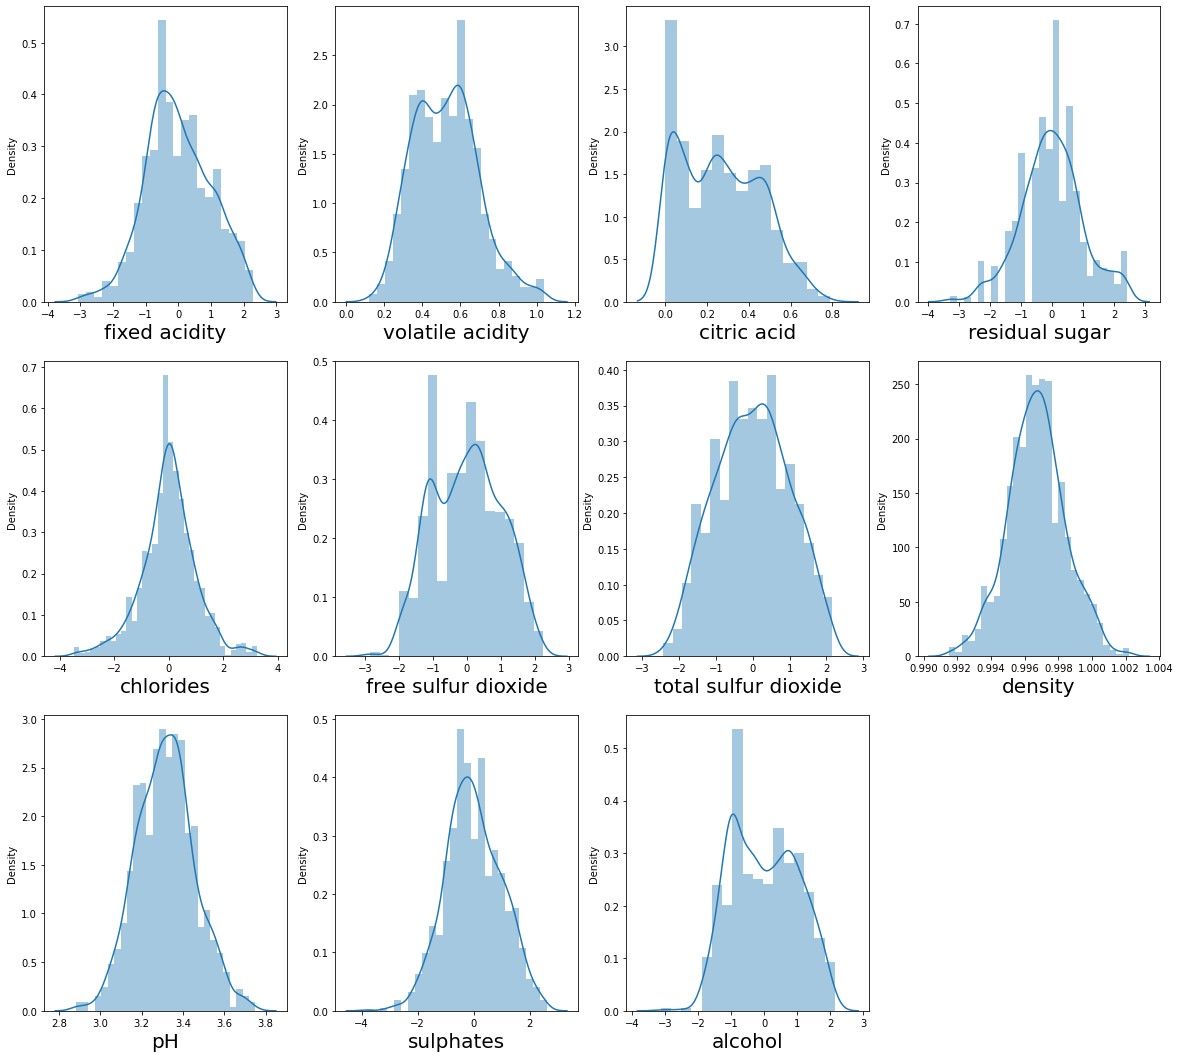

In [58]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Distributions look much more Normalised now.

# Feature Selection

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [61]:
scaled_X

array([[-0.46910218,  1.0387081 , -1.38741253, ...,  1.37476832,
        -0.58823037, -1.11232895],
       [-0.17212704,  2.10132549, -1.38741253, ..., -0.82375195,
         0.45352708, -0.52685366],
       [-0.17212704,  1.39291389, -1.17821377, ..., -0.3982319 ,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.0829436 , -0.70751654, ...,  0.73648824,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.71401945, -0.75981623, ...,  1.80028837,
         0.66861292, -0.03320546],
       [-1.77310975, -1.26362959,  1.07067297, ...,  0.52372821,
         0.30109116,  0.7428399 ]])

# Checking for Multicollinearity using Variance Inflation Factor

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
vif = pd.DataFrame()

In [64]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [65]:
vif

,Features,vif
0,fixed acidity,6.878090
1,volatile acidity,1.843893
2,citric acid,2.969303
3,residual sugar,1.687033
4,chlorides,1.264782
5,free sulfur dioxide,2.830927
6,total sulfur dioxide,3.159700
7,density,5.600673
8,pH,3.173526
9,sulphates,1.372701


'fixed acidity' has a VIF value of 6.87 and 'density' has a VIF value of 5.60. Since the values are greater than 5, there is considerable multicollinearity. One of the features can be dropped based on which of the two has a lesser ANOVA f-value score.

# Selecting Kbest Features

In [66]:
from sklearn.feature_selection import SelectKBest, f_classif

In [67]:
bestfeat = SelectKBest(score_func = f_classif, k = 11)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [68]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

                 Feature       Score
10               alcohol  357.197024
9              sulphates  217.347496
1       volatile acidity  141.219761
6   total sulfur dioxide   67.743569
2            citric acid   43.303015
7                density   33.218872
4              chlorides   25.256972
0          fixed acidity   14.579040
5    free sulfur dioxide    5.162772
8                     pH    1.578352
3         residual sugar    0.679569


# Selecting the best features based on their scores.

In [69]:
xbest = X.drop(columns = ['pH','residual sugar','fixed acidity'])

In [70]:
xbest

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,0.700,0.00,-0.145674,-0.238196,-0.063312,0.99780,-0.588230,-1.112329
1,0.880,0.00,0.981105,1.092232,0.954919,0.99680,0.453527,-0.526854
2,0.760,0.04,0.714585,0.241177,0.626959,0.99700,0.221989,-0.526854
3,0.280,0.56,-0.207728,0.442705,0.786687,0.99800,-0.391548,-0.526854
4,0.700,0.00,-0.145674,-0.238196,-0.063312,0.99780,-0.588230,-1.112329
...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.619516,1.530345,0.319096,0.99490,-0.391548,0.287108
1595,0.550,0.10,-1.120823,1.893947,0.540682,0.99512,0.994340,0.901833
1596,0.510,0.13,-0.145674,1.353559,0.177040,0.99574,0.932248,0.742840
1597,0.645,0.12,-0.207728,1.530345,0.319096,0.99547,0.668613,-0.033205


In [71]:
scaled_X = scaler.fit_transform(xbest)

# Classification Model Building

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

Finding the best random state

In [73]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.838495575221239 on random_state: 11


In [74]:
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .30, random_state = 11)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [76]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier()

# Training the Models

In [77]:
DTC.fit(x_train,y_train)
RFC.fit(x_train,y_train)
SV.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

# Decision Tree Classifier Model Accuracy

In [78]:
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)

In [79]:
conf_matrx = confusion_matrix(y_test,DTCpred)
conf_matrx

array([[155,  50],
       [ 42, 191]], dtype=int64)

In [80]:
print(accu)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       205
           1       0.79      0.82      0.81       233

    accuracy                           0.79       438
   macro avg       0.79      0.79      0.79       438
weighted avg       0.79      0.79      0.79       438



# Logistic Regression Model Accuracy

In [81]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [82]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[134,  71],
       [ 32, 201]], dtype=int64)

In [83]:
print(accu)

              precision    recall  f1-score   support

           0       0.81      0.65      0.72       205
           1       0.74      0.86      0.80       233

    accuracy                           0.76       438
   macro avg       0.77      0.76      0.76       438
weighted avg       0.77      0.76      0.76       438



# Random Forest Classifier Model Accuracy

In [84]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [85]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[171,  34],
       [ 30, 203]], dtype=int64)

In [86]:
print(accu)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       205
           1       0.86      0.87      0.86       233

    accuracy                           0.85       438
   macro avg       0.85      0.85      0.85       438
weighted avg       0.85      0.85      0.85       438



# SV Classifier Model Accuracy

In [87]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)

In [88]:
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[156,  49],
       [ 39, 194]], dtype=int64)

In [89]:
print(accu)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       205
           1       0.80      0.83      0.82       233

    accuracy                           0.80       438
   macro avg       0.80      0.80      0.80       438
weighted avg       0.80      0.80      0.80       438



# K Nearest Neighbours Classifier Model Accuracy

In [90]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)

In [91]:
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[141,  64],
       [ 46, 187]], dtype=int64)

In [92]:
print(accu)

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       205
           1       0.75      0.80      0.77       233

    accuracy                           0.75       438
   macro avg       0.75      0.75      0.75       438
weighted avg       0.75      0.75      0.75       438



# Model Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score as cvs

# Decision Tree Classifier

In [94]:
print(cvs(DTC,scaled_X,y,cv=5).mean())

0.6639198794897143


# Logistic Regression

In [95]:
print(cvs(LOGR,scaled_X,y,cv=5).mean())

0.7215412135762369


# Random Forest Classifier

In [96]:
print(cvs(RFC,scaled_X,y,cv=5).mean())

0.7174222096690676


# SV Classifier

In [97]:
print(cvs(SV,scaled_X,y,cv=5).mean())

0.7174292708186226


# K Nearest Neighbours Classifier

In [98]:
print(cvs(KNN,scaled_X,y,cv=5).mean())

0.687214611872146


# Based on comparing Accuracy Score results with Cross Validation results, it is determined that Logistic Regression is the best model.

# ROC AUC Scores

# Decision Tree Classifier

In [99]:
roc_auc_score(y_test,DTCpred)

0.787920025122998

# Logistic Regression

In [100]:
roc_auc_score(y_test,LOGRpred)

0.7581597403956872

# Random Forest Classifier

In [101]:
roc_auc_score(y_test,RFCpred)

0.8526954883282738

# SV Classifier

In [102]:
roc_auc_score(y_test,SVpred)

0.7967968177535852

# K Nearest Neighbours Classifier

In [103]:
roc_auc_score(y_test,KNNpred)

0.7451899926724588

# Random Forest Classifier is the best model for the dataset, with roc_auc_score 0.839

# ROC AUC curves

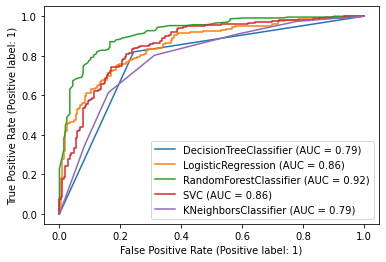

In [104]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,SV,KNN]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

# Based on the above graph, Random Forest Classifier is the best model for the dataset, with AUC = 0.92

# Hyper Parameter Tuning

# Random Forest Classifier

In [105]:
from sklearn.model_selection import GridSearchCV

In [108]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy']}

In [109]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)

In [110]:
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [111]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 80,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 50}

In [112]:
Best_mod = RandomForestClassifier(n_estimators = 50,criterion = 'entropy', max_depth= 60, max_features = 'sqrt',min_samples_leaf = 5, min_samples_split = 10)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

83.33333333333334


In [113]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[160,  45],
       [ 28, 205]], dtype=int64)

# Random Forest Classifier has an accuracy of 84.70%

# Logistic Regression

In [114]:
parameter = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'dual': [True,False],'fit_intercept':[True,False],'random_state':[1,2,5,10,20],'solver':['liblinear']}

In [115]:
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1)

In [116]:
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [1, 2, 5, 10, 20],
                         'solver': ['liblinear']})

In [117]:
GridCV.best_params_

{'dual': False,
 'fit_intercept': False,
 'penalty': 'l1',
 'random_state': 1,
 'solver': 'liblinear'}

In [118]:
Best_mod2 = LogisticRegression(dual = False,fit_intercept = False,max_iter = 100,multi_class = 'auto', penalty = 'l1',random_state= 1,solver = 'liblinear')
Best_mod2.fit(x_train,y_train)
lrpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,lrpred)
print(acc*100)

76.9406392694064


# Logistic Regression has an accuracy of 76.94%

In [119]:
conf_matrx = confusion_matrix(y_test,lrpred)
conf_matrx

array([[154,  51],
       [ 50, 183]], dtype=int64)

In [120]:
roc_auc_score(y_test,rfpred)

0.8301580655291532

In [121]:
roc_auc_score(y_test,lrpred)

0.7683136187585051

On comparing the accuracies and ROC AUC scores of the Random Forest Classifier Model and Logistic Regression Model, it is determined that Random Forest Classifier Model is better.



# Random Forest Classifier also has better Confusion matrix performance than Logistic Regression

# Saving The Model

In [122]:
import joblib
joblib.dump(Best_mod,"BestModelWine.pkl")

['BestModelWine.pkl']

# Loading The Model

In [123]:
mod=joblib.load("BestModelWine.pkl")

In [124]:
print(mod.predict(x_test))

[0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0
 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0
 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0]
